In [210]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


In [211]:
data = pd.read_csv('report.csv')

In [212]:
data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [213]:
data.shape

(2829, 15)

In [214]:
len(data['report_year'].unique())

41

In [215]:
data.reset_index(drop=True)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


In [216]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [217]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [218]:
data=data[['report_year','agency_jurisdiction','homicides','homicides_percapita']]

In [219]:
data.head()

,report_year,agency_jurisdiction,homicides,homicides_percapita
0,1975,"Albuquerque, NM",30.0,10.48
1,1975,"Arlington, TX",5.0,4.45
2,1975,"Atlanta, GA",185.0,37.71
3,1975,"Aurora, CO",7.0,6.00
4,1975,"Austin, TX",33.0,10.99


In [220]:
df=data.loc[data['agency_jurisdiction'] == 'New York City, NY']

In [221]:
df.head()

,report_year,agency_jurisdiction,homicides,homicides_percapita
41,1975,"New York City, NY",1645.0,22.16
110,1976,"New York City, NY",1622.0,21.54
179,1977,"New York City, NY",1557.0,20.81
248,1978,"New York City, NY",1503.0,20.75
317,1979,"New York City, NY",1733.0,24.38


In [222]:
df.isnull().sum()

report_year            0
agency_jurisdiction    0
homicides              0
homicides_percapita    0
dtype: int64

In [223]:
df.reset_index(drop=True)

,report_year,agency_jurisdiction,homicides,homicides_percapita
0,1975,"New York City, NY",1645.0,22.16
1,1976,"New York City, NY",1622.0,21.54
2,1977,"New York City, NY",1557.0,20.81
3,1978,"New York City, NY",1503.0,20.75
4,1979,"New York City, NY",1733.0,24.38
5,1980,"New York City, NY",1812.0,25.76
6,1981,"New York City, NY",1826.0,25.83
7,1982,"New York City, NY",1668.0,23.50
8,1983,"New York City, NY",1622.0,22.84
9,1984,"New York City, NY",1450.0,20.23


In [224]:
hc=df[['report_year','homicides_percapita']]
hc.set_index('report_year',inplace=True)
hc.shape

(41, 1)

In [225]:
hc.head()

,homicides_percapita
report_year,
1975,22.16
1976,21.54
1977,20.81
1978,20.75
1979,24.38


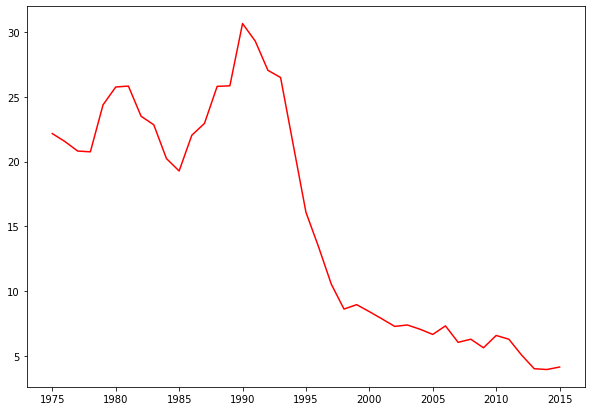

In [226]:
plt.figure(figsize=(10,7))
plt.plot(hc,'r-')

In [227]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(hc)


(0.10831137369148046, True)

In [228]:
from statsmodels.tsa.stattools import adfuller

In [229]:
result = adfuller(hc, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -0.7290041523265544
n_lags: 0.8390931045571773
p-value: 0.8390931045571773
Critial Values:
   1%, -3.6461350877925254
Critial Values:
   5%, -2.954126991123355
Critial Values:
   10%, -2.6159676124885216


In [230]:
train=hc[:35]
test=hc[34:]

In [231]:
train.tail()

,homicides_percapita
report_year,
2005,6.64
2006,7.30
2007,6.03
2008,6.27
2009,5.61


In [232]:
test.head()

,homicides_percapita
report_year,
2009,5.61
2010,6.56
2011,6.27
2012,5.05
2013,3.99


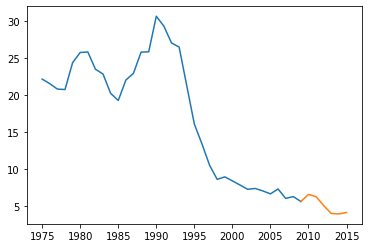

In [233]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")

C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


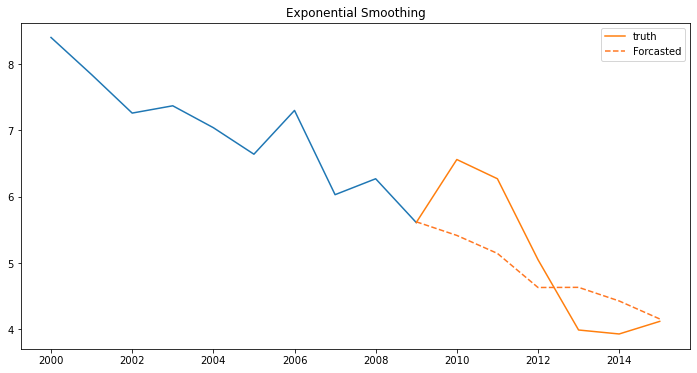

In [245]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=4)
#model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(7)
#fit2 = model2.fit()
#pred2 = fit2.forecast(7)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
#sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[25:35], train.values[25:35]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='#ff7823',label="Forcasted".format(sse1, fit.aic));
#ax.plot(test.index, pred2, linestyle='--', color='#3c763d',label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Exponential Smoothing");

In [246]:
from sklearn.metrics import r2_score
r2_score(test, pred)

0.5336336066752686

In [205]:
arima_model =  auto_arima(train,start_p=2, d=1, start_q=2, 
                          max_p=10, max_d=5, max_q=7, start_P=1, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=0, m=27, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,random_state=40,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,0)[27] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[27] intercept   : AIC=149.987, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[27] intercept   : AIC=146.016, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[27] intercept   : AIC=147.881, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[27]             : AIC=149.816, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[27] intercept   : AIC=145.978, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[27] intercept   : AIC=146.815, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[27] intercept   : AIC=147.314, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[27] intercept   : AIC=148.790, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[27]             : AIC=144.801, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[27]             : AIC=144.780, Time=0.16 sec
 ARIMA(1,1,0)(2,0,0)[27]             : AIC=146.780, Time=0.33 sec
 ARIMA(0,1,0)(1,0,0)[27]             : AIC=150.593, Time=0.08 sec
 ARIMA(2,1,0)(1,0,0)[27]             : AIC=146.324, Time=0.13 sec
 ARIMA(1,1,1)(1,0,0)[27]             

In [206]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   35
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 27)   Log Likelihood                 -69.390
Date:                            Sat, 09 Jan 2021   AIC                            144.780
Time:                                    10:49:11   BIC                            149.359
Sample:                                         0   HQIC                           146.341
                                             - 35                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4501      0.156      2.894      0.004       0.145       0.755
ar.S.L27       0.7001      0.236      2.972      0.003       0.238       1.162
sigma2         2.0183      1.325      1.524      0.128      -0.578       4.615
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.73   Prob(JB):                         0.61
Heteroskedasticity (H):               0.48   Skew:                             0.30
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 7),index=test.index)
prediction.columns = ['predicted_homicide_crimes_percapita']
prediction

,predicted_homicide_crimes_percapita
report_year,
2009,5.585089
2010,3.954572
2011,3.371032
2012,5.343194
2013,6.005236
2014,8.015622
2015,8.047261


Predicted Homicide_percapita Crime Rates of NY 


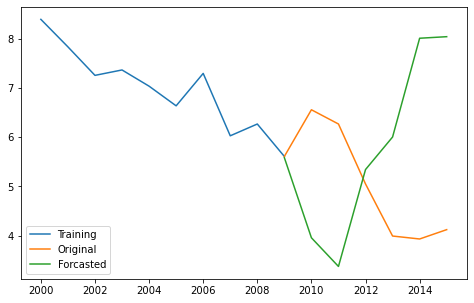

In [239]:
print("Predicted Homicide_percapita Crime Rates of NY ")
plt.figure(figsize=(8,5))
plt.plot(train[25:],label="Training")
plt.plot(test,label="Original")
plt.plot(prediction,label="Forcasted")
plt.legend()
plt.show()

In [209]:
from sklearn.metrics import r2_score
r2_score(test['homicides_percapita'], prediction['predicted_homicide_crimes_percapita'])


-6.029112502720741

In [242]:
#from sklearn.metrics import accuracy_score
#print(accuracy_score(test['homicides_percapita'],prediction['predicted_homicide_crimes_percapita']))